# Installing Required Libraries:

In [9]:
# Install necessary libraries
!pip install numpy psutil matplotlib


# Import Libraries:

In [10]:
import numpy as np
import time
import multiprocessing
import psutil
import matplotlib.pyplot as plt
import os
import pandas as pd


# Get the number of cores

In [11]:
import multiprocessing

numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)

Num of cores are:  16


# Get the active number of threads:

In [12]:
import threading

activeThread = threading.activeCount()
print ("Num of threads: ",activeThread)

Num of threads:  6


# Define Matrix Multiplication Function:

In [13]:
def multiply_matrices(n, num_threads):
    constant_matrix = np.random.rand(n, n)
    random_matrices = [np.random.rand(n, n) for _ in range(100)]

    if num_threads > 1:
        os.environ["NUMEXPR_NUM_THREADS"] = str(num_threads)
        os.environ["OMP_NUM_THREADS"] = str(num_threads)

    start_time = time.time()
    result_matrices = [np.matmul(constant_matrix, mat) for mat in random_matrices]
    end_time = time.time()
    time_taken = end_time - start_time

    return time_taken


# Main Function to Perform Multiplication and Collect Data:

In [14]:
if __name__ == "__main__":
    n = 1000
    num_threads_list = [1, 2, 3, 4, 5, 6]
    time_taken_list = []
    cpu_usage_list = []

    for num_threads in num_threads_list:
        process = psutil.Process()
        start_cpu_usage = process.cpu_percent()

        time_taken = multiply_matrices(n, num_threads)
        time_taken_list.append(time_taken)

        end_cpu_usage = process.cpu_percent()
        cpu_usage_list.append(end_cpu_usage - start_cpu_usage)

        print(f"Threads T={num_threads}: CPU Usage: {end_cpu_usage - start_cpu_usage}%")


Threads T=1: CPU Usage: 181.7%
Threads T=2: CPU Usage: 292.8%
Threads T=3: CPU Usage: 225.1%
Threads T=4: CPU Usage: 214.8%
Threads T=5: CPU Usage: 270.2%
Threads T=6: CPU Usage: 287.9%


# Visualize Time Taken vs Number of Threads:

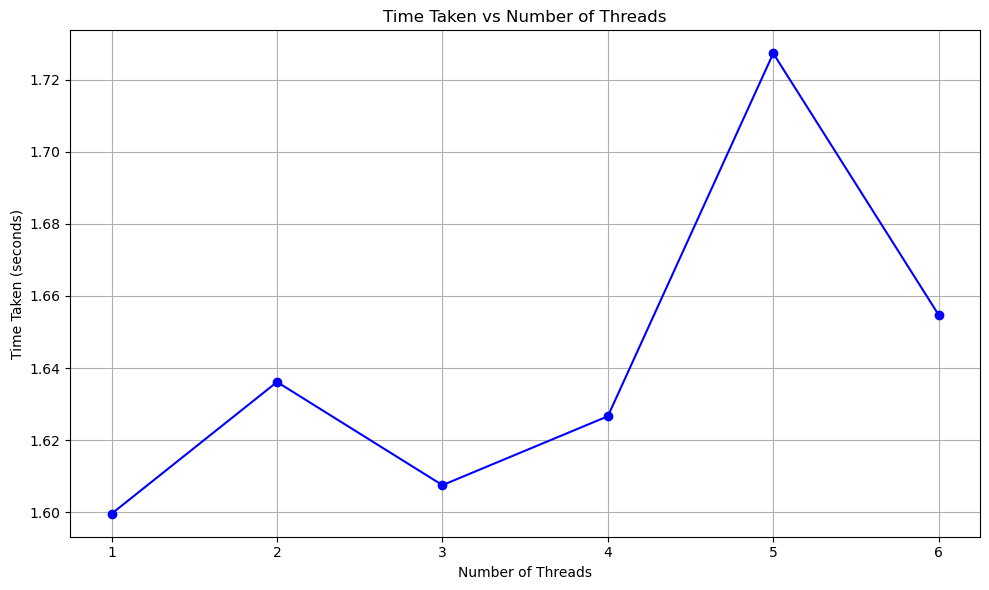

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(num_threads_list, time_taken_list, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken vs Number of Threads')
plt.grid(True)
plt.xticks(num_threads_list)
plt.tight_layout()
plt.show()


# Visualize CPU Usage vs Number of Threads:

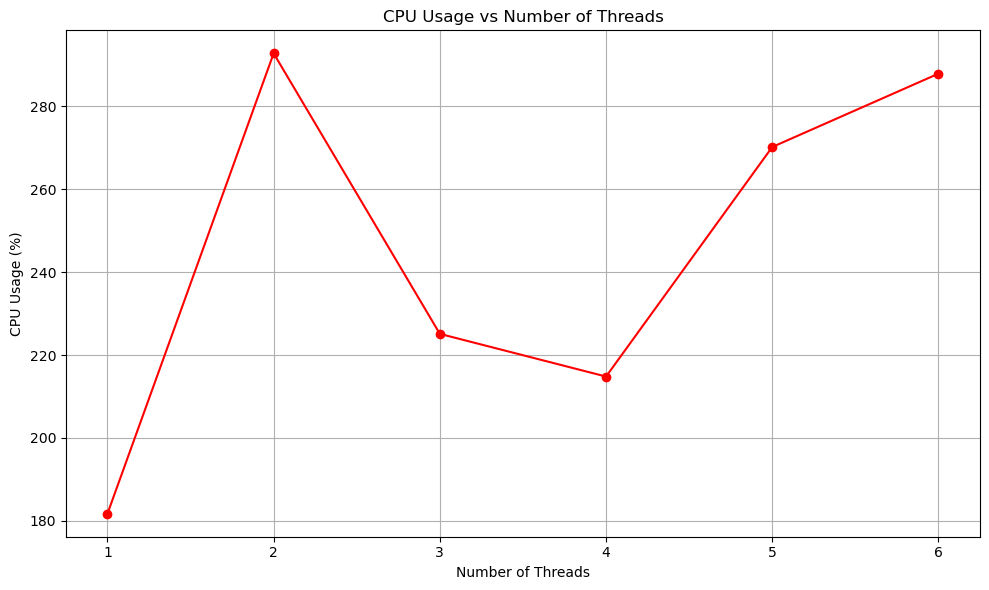

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(num_threads_list, cpu_usage_list, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Threads')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage vs Number of Threads')
plt.grid(True)
plt.xticks(num_threads_list)
plt.tight_layout()
plt.show()


# Visualizing Performance of 8 Threads in Parallel

Threads T=1: CPU Usage: 252.9%
Threads T=2: CPU Usage: 272.7%
Threads T=3: CPU Usage: 146.2%
Threads T=4: CPU Usage: 203.4%
Threads T=5: CPU Usage: 177.1%
Threads T=6: CPU Usage: 145.6%


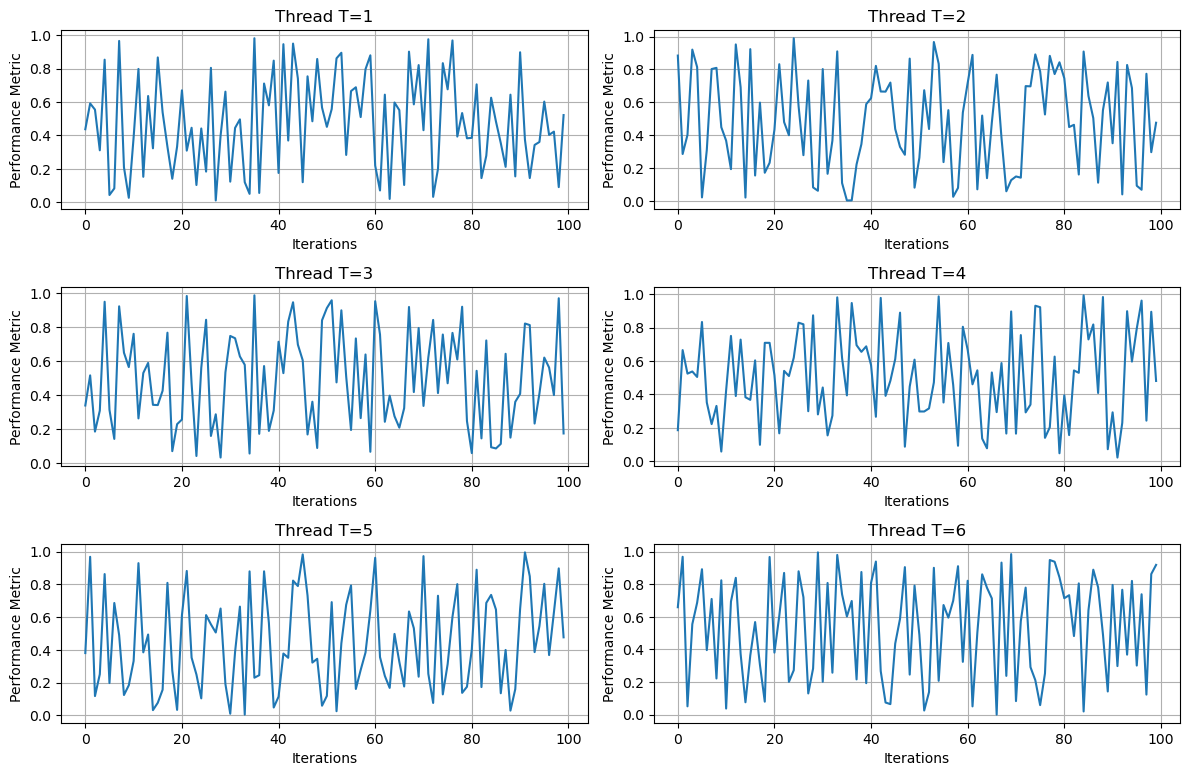

In [17]:
plt.figure(figsize=(12, 10))

for i, num_threads in enumerate(num_threads_list, start=1):
    plt.subplot(4, 2, i)

    process = psutil.Process()
    start_cpu_usage = process.cpu_percent()

    time_taken = multiply_matrices(n, num_threads)

    end_cpu_usage = process.cpu_percent()

    plt.plot(range(100), np.random.rand(100))  # Replace with your data for each thread
    plt.title(f'Thread T={num_threads}')
    plt.xlabel('Iterations')
    plt.ylabel('Performance Metric')
    plt.grid(True)
    plt.tight_layout()

    print(f"Threads T={num_threads}: CPU Usage: {end_cpu_usage - start_cpu_usage}%")

plt.show()


# Display Time vs Number of Threads Table:

In [18]:
data = {
    "Threads": num_threads_list,
    "Time Taken (seconds)": time_taken_list
}
time_df = pd.DataFrame(data)

print("\nTime vs Number of Threads Table:\n")
print(time_df)



Time vs Number of Threads Table:

   Threads  Time Taken (seconds)
0        1              1.599591
1        2              1.636140
2        3              1.607517
3        4              1.626627
4        5              1.727323
5        6              1.654755
